In [1]:
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import rcParams
from operator import itemgetter
from typing import Callable, Dict, List, Set, Tuple
from scipy.optimize import curve_fit
import csv
import json

In [2]:
from util import calculate_derivative,pointInterval_to_pressure
from baseline import detect_breakpoints_startPoint, detect_breakpoints, detect_breakpoints_2, detect_breakpoints_3,detect_breakpoints_4,detect_breakpoints_startPoint2
from plot import PlotNSave
from data_load_N_preprocess import LoadNPreprocessData

In [3]:
#!pip install astropy

In [4]:
file_path=pressure_filePath="../data_input/pattern_left.txt"
pattern_left = pd.read_csv(file_path, delimiter=" ",skiprows=1, names=["X", "Y"],skipinitialspace = True)
pattern_left["X"]= pattern_left["X"]-pattern_left["X"][0]
pattern_left["Y"]= pattern_left["Y"]-pattern_left["Y"][0]
print(pattern_left.describe())


pattern_left_top=pattern_left.loc[pattern_left["Y"]>0]
pattern_left_bottom=pattern_left.loc[pattern_left["Y"]<0]

                X           Y
count  106.000000  106.000000
mean    -6.447343    1.100501
std      3.845383    2.987507
min    -14.049790   -2.763160
25%     -9.565758   -2.051525
50%     -6.371515    1.160395
75%     -3.177262    4.181658
max      0.000000    5.118920


In [5]:
file_path=pressure_filePath="../data_input/pattern_right_top.txt"
pattern_right_top = pd.read_csv(file_path, delimiter=" ",skiprows=1, names=["X", "Y"],skipinitialspace = True)
pattern_right_top["X"]= pattern_right_top["X"]-pattern_right_top["X"][0]
pattern_right_top["Y"]= pattern_right_top["Y"]-pattern_right_top["Y"][0]
pattern_right_top= pattern_right_top.clip(lower=0)
print(pattern_right_top.describe())
# pd.set_option('display.max_rows', pattern_right_top.shape[0]+1)
# pattern_right_top 


               X          Y
count  69.000000  69.000000
mean    1.339242   8.207413
std     1.180701   5.028328
min     0.000000   0.000000
25%     0.371150   3.726520
50%     0.962310   8.391060
75%     2.050570  12.649460
max     4.186780  16.254090


In [6]:
file_path=pressure_filePath="../data_input/pattern_right_bottom.txt"
pattern_right_bottom = pd.read_csv(file_path, delimiter=" ",skiprows=1, names=["X", "Y"],skipinitialspace = True)
pattern_right_bottom["X"]= pattern_right_bottom["X"]-pattern_right_bottom["X"][0]
pattern_right_bottom["Y"]= pattern_right_bottom["Y"]-pattern_right_bottom["Y"][0]

pattern_right_bottom= pattern_right_bottom.clip(lower=0)

print(pattern_right_bottom.describe())


               X          Y
count  77.000000  77.000000
mean    5.628174   6.761963
std     3.985883   3.379727
min     0.000000   0.000000
25%     1.995140   4.067440
50%     5.219620   7.767010
75%     9.048680   9.699000
max    12.877740  10.923490


In [7]:
def test_func_1(x, a,b,c,d):
    y = a+b*x-c*np.exp(d*x)
    return y
def test_func_2(x, a,b,c,d):
    y = a+b*x-c*np.exp(-d*x)
    return y

In [8]:
def fit_curve(xdata,ydata,test_func):
    x = np.asarray(xdata)
    y = np.asarray(ydata)
    parameters, covariance = curve_fit(test_func, x, y)
#     parameters, covariance = curve_fit(test_func, xdata, ydata)

    fit_a = parameters[0]
    fit_b = parameters[1]
    fit_c = parameters[2]
    fit_d = parameters[3]

    print(F'The parameters is {parameters}.')


    y_fit = test_func(x, fit_a, fit_b,fit_c,fit_d)

    plt.plot(x, y, 'o', label='data')
    plt.plot(x, y_fit, '-', label='LJ fit')
    return fit_a,fit_b,fit_c,fit_d

The parameters is [ 4.12959938 -0.07459858  4.31571225  0.27952833].
The parameters is [-3.00297354e+00 -3.35921627e-04 -2.99822437e+00  2.29392013e-01].
The parameters is [13.14227315  0.78460405 13.4545323   0.90468973].
The parameters is [8.77210719 0.17952762 8.95294473 0.28833003].


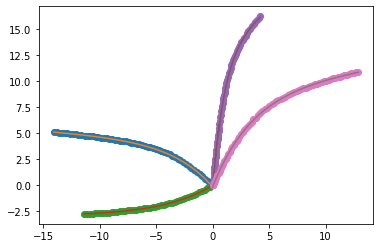

In [9]:
fit_parameters={}
curves=[pattern_left_top,pattern_left_bottom,pattern_right_top,pattern_right_bottom]
test_func=[test_func_1,test_func_1,test_func_2,test_func_2]
names=["pattern_left_top","pattern_left_bottom","pattern_right_top","pattern_right_bottom"]
for curve, func,name in zip(curves,test_func,names):
    xdata=curve["X"]
    ydata=curve["Y"]
    fit_parameters[name]=fit_curve(xdata,ydata,func)


# Synthetic_1

In [10]:
#experiment setup
ground_truth=[107, 164, 243, 328, 375, 446, 644, 713, 771, 820, 887, 953, 1036, 1101, 1179, 1254, 1319, 1396, 1456, 1513, 1598, 1648, 1719, 1784, 1875, 1938, 2017, 2073, 2185, 2247, 2315, 2369, 2433, 2487, 2552, 2610, 2835, 2916, 2965, 3044, 3101, 3240, 3284, 3368, 3411]
print(len(ground_truth))
# colum_names ={"pressure":{"Date","Pressure (psia)","first_order_derivative","second_order_derivative"},
#                     "rate":{"Time@end","Liquid rate (STB/D)"}}

colum_names={"pressure":{"time":"Date",
                        "measure":"Pressure (psia)",
                        "first_order_derivative":"first_order_derivative",
                        "second_order_derivative":"second_order_derivative"},
             "rate":{"time":"Time@end",
                     "measure":"Liquid rate (STB/D)"}}
data_inOneRow=400
pressure_filePath="../data_input/Synthetic_Data.xlsx"
rate_filePath="../data_input/Synthetic_Data.xlsx"

45


In [11]:
ground_truth_buildUp=[point for index, point in enumerate(ground_truth) if index%2!=0]
ground_truth_buildUp
len(ground_truth_buildUp)

22

In [12]:
processed_data=LoadNPreprocessData(pressure_filePath=pressure_filePath, 
                 rate_filePath=rate_filePath, 
                 colum_names=colum_names, 
                 use_SG_smoothing=False)
pressure_df=processed_data.pressure_df
rate_df=processed_data.rate_df

display(pressure_df)
display(rate_df)


---load data from 'txt' or 'xlsx' files...
---The first & second order derivative has been calculated and appended to pressure dataframe


,Date,Pressure (psia),first_order_derivative,second_order_derivative
0,0.000000,2000.000000,15175.401994,-1.593896e+06
1,0.006111,2092.738568,5434.926885,-2.211251e+05
2,0.012222,2125.952010,4083.606969,-1.648675e+05
3,0.018056,2149.773050,3121.879672,-7.945161e+04
4,0.024167,2168.851204,2636.342081,-5.537004e+04
...,...,...,...,...
3514,5938.051389,2327.338989,-0.150989,1.763948e-04
3515,5968.345556,2322.764893,-0.145646,1.653610e-04
3516,5998.640000,2318.352641,-0.140636,1.544522e-04
3517,6028.934444,2314.092149,-0.135957,0.000000e+00


,Time@end,Liquid rate (STB/D)
0,0.000000,-6742.395145
1,253.216667,-8513.514104
2,264.358333,0.000000
3,274.191667,-5548.484464
4,296.716667,-8951.244013
...,...,...
90,4465.793056,0.107707
91,4465.834722,0.105123
92,4465.909722,-1909.311284
93,5058.868056,-5453.279913


In [129]:
def polyval_func_wapper(x, p3):
    y = np.polyval(p3,x)
    return y
class PatternRecognition:
    def __init__(self, 
                 delta_pointNumber:int=5,
                 deltaTime_learn:float=0.1,
                 fitting_func=polyval_func_wapper,
#                  filePath_learnedPattern="../data_output/Learned_Pattern.csv",
                 filePath_learnedPattern="../data_output/Learned_Pattern.jason",
#                 filepath_curveDataLeft= "../data_output/curveDataLeft_forLearning.csv",
#                 filepath_curveDataRight= "../data_output/curveDataRight_forLearning.csv"
                ):
        

        self.colum_names=colum_names
        self.delta_pointNumber=delta_pointNumber
        self.deltaTime_learn=deltaTime_learn
        self.fitting_func=fitting_func
        self.filePath_learnedPattern=filePath_learnedPattern
#         self.filepath_curveDataLeft=filepath_curveDataLeft
#         self.filepath_curveDataRight=filepath_curveDataRight
        
        self.border_names=["left_top","left_bottom","right_top","right_bottom"]
        self.curveData=pd.DataFrame(columns=['pressure_time_left', 
                                             'pressure_measure_left',
                                             'pressure_time_right', 
                                             'pressure_measure_right'])
        self.borderData=pd.DataFrame(columns=self.border_names)
        self.data_forPredict=pd.DataFrame()
        self.curveLeft_parameters=[]
        self.curveRight_parameters=[]
        self.parameters_PatternField={}
        self.x_leftPlot=[]
        self.x_rightPlot=[]
        self.patternLoaded=False
    
    
    def load_pattern(self,filePath_savedPattern):
        with open(filePath_savedPattern) as infile:
            self.parameters_PatternField = json.load(infile)
        print(f"The pattern parameters {self.parameters_PatternField} are loaded")
    
        
    def produceNSave_curveData(self,pressure_measure,pressure_time,points):  
        self.curveData=pd.DataFrame(columns=['pressure_time_left', 
                                             'pressure_measure_left',
                                             'pressure_time_right', 
                                             'pressure_measure_right'])
        
        for point_index in points:
            #left   
            sub_measure=pressure_measure[point_index+1-self.delta_pointNumber:point_index+1]
            sub_time=pressure_time[point_index+1-self.delta_pointNumber:point_index+1]
            curve_pressure=[round(measure-sub_measure[-1],6) for measure in sub_measure]
            curve_time=[round(time-sub_time[-1],6) for time in sub_time]
            data={"pressure_time_left":curve_time,"pressure_measure_left":curve_pressure}
        
            
            #right
            sub_measure=pressure_measure[point_index:point_index+self.delta_pointNumber]
            sub_time=pressure_time[point_index:point_index+self.delta_pointNumber]
            curve_pressure=[round(measure-sub_measure[0],6) for measure in sub_measure]
            curve_time=[round(time-sub_time[0],6) for time in sub_time]
            data.update({"pressure_time_right":curve_time,
                         "pressure_measure_right":curve_pressure})
            
            
            self.curveData=self.curveData.append(data,ignore_index=True)
       
#         self.curveDataLeft.to_csv(self.filepath_curveDataLeft,index=False,float_format='%.4f',sep='\t')
#         self.curveDataRight.to_csv(self.filepath_curveDataRight,index=False,float_format='%.4f',sep='\t') 


    def fit_curve(self,xdata,ydata):
        x = np.asarray(xdata)
        y = np.asarray(ydata)
        
#         parameters, covariance = curve_fit(self.fitting_func, x, y)
#         y_fit = self.fitting_func(x, *parameters)
        parameters=np.polyfit(x,y,3)
        y_fit=np.polyval(parameters,x)
#         print(parameters)

        plt.plot(x, y, 'o')
        plt.plot(x, y_fit, '-')
#         plt.show()
        return parameters
    
    def calculate_Parameters_allCurve(self):
        self.curveLeft_parameters=[]
        self.curveRight_parameters=[]
        if len(self.parameters_PatternField)>0:
            self.curveLeft_parameters=[self.parameters_PatternField["left_bottom"],
                                       self.parameters_PatternField["left_top"]]
            self.curveRight_parameters=[self.parameters_PatternField["right_bottom"],
                           self.parameters_PatternField["right_top"]]
        
        plt.figure(figsize = (20, 10))

        for i in range(len(self.curveData)):
            #left side
                        
#             print("-----------i---------",i)
            xdata=self.curveData["pressure_time_left"][i]
            ydata=self.curveData["pressure_measure_left"][i]
#             print(xdata,ydata)
            if i==0:
                xLeft_min=abs(xdata[0])
                self.x_leftPlot=xdata
            if i>0 and abs(xdata[0])<xLeft_min:
                xLeft_min=abs(xdata[0])
                self.x_leftPlot=xdata
                
         
            self.curveLeft_parameters.append(self.fit_curve(xdata,ydata))

            
            #right side
            xdata=self.curveData["pressure_time_right"][i]
            ydata=self.curveData["pressure_measure_right"][i]
            if i==0:
                xRight_min=abs(xdata[-1])
                self.x_rightPlot=xdata
            if i>0 and abs(xdata[-1])<xRight_min:
                xRight_min=abs(xdata[-1])
                self.x_rightPlot=xdata
          
            self.curveRight_parameters.append(self.fit_curve(xdata,ydata))
        
            
    def calculate_PatternField(self):
#         y_left_allCurve = np.empty((0, len(self.x_leftPlot)), float)
#         y_right_allCurve = np.empty((0, len(self.x_rightPlot)), float)
  
#         #left
#         x_left=np.asarray(self.x_leftPlot)
#         x_right=np.asarray(self.x_rightPlot)
        number=30
        timeInterval=0.5
        y_left_allCurve = np.empty((0, number), float)
        y_right_allCurve = np.empty((0, number), float)
        x_left=np.linspace(start = -timeInterval, stop = 0, num = number)
        x_right=np.linspace(start = 0, stop = timeInterval, num = number)
    
        fig=plt.figure(figsize = (20, 10))
        curve_number=len(self.curveRight_parameters)
        for i in range(curve_number):
            y_left=self.fitting_func(x_left, self.curveLeft_parameters[i])
            y_right=self.fitting_func(x_right, self.curveRight_parameters[i])
            
            y_left_allCurve=np.append(y_left_allCurve,np.array([y_left]), axis=0)
            y_right_allCurve=np.append(y_right_allCurve,np.array([y_right]), axis=0)
            

            if self.patternLoaded and (i==0 or i==1):
                plt.plot(x_right, y_right, 'r+', 
                         label='Old_pattern',
                         color="red",
                         linewidth=4)
                plt.plot(x_left, y_left, 'r+', 
                         label='Old_patern',
                         color="red",
                         linewidth=4)
            else:
                plt.plot(x_right, y_right, '-', label='New_fit',
                     color="yellow",linewidth=1)
                plt.plot(x_left, y_left, '-', label='New_fit',
                         color="yellow",linewidth=1)        
            
        left_parameters_PatternField=self.fitNPlot_maxNMin(x_left,y_left_allCurve)
        right_parameters_PatternField=self.fitNPlot_maxNMin(x_right,y_right_allCurve)
        self.parameters_PatternField["left_top"]=left_parameters_PatternField["top"]
        self.parameters_PatternField["left_bottom"]=left_parameters_PatternField["bottom"]
        self.parameters_PatternField["right_top"]=right_parameters_PatternField["top"]
        self.parameters_PatternField["right_bottom"]=right_parameters_PatternField["bottom"]
        
        self.legend_without_duplicate_labels(fig)
        
    def legend_without_duplicate_labels(self,figure):
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        figure.legend(by_label.values(), by_label.keys(),shadow=True, fontsize='large')


    def fitNPlot_maxNMin(self,x,y_allCurve):
        half_parameters_PatternField={}
        
        y_allCurve_max=y_allCurve.max(axis=0)
        half_parameters_PatternField["top"]=self.fit_curve(x,y_allCurve_max)
     
        y_allCurve_min=y_allCurve.min(axis=0)
        half_parameters_PatternField["bottom"]=self.fit_curve(x,y_allCurve_min)
        
        return half_parameters_PatternField
    
    def learn(self,pressure_measure,pressure_time,ground_truth,filePath_savedPattern=None):
        if filePath_savedPattern!=None:
            self.load_pattern(filePath_savedPattern)
            self.PatternLoaded=True
        self.produceNSave_curveData(pressure_measure,pressure_time,ground_truth)
        self.calculate_Parameters_allCurve()
        self.calculate_PatternField()
        
#     def sav_pattern(self):
#         print("self.parameters_PatternField",self.parameters_PatternField)
#         pattern_df=pd.DataFrame({key:[value] for key,value in self.parameters_PatternField.items()})
#         with open(self.filePath_learnedPattern, 'a') as f:
#             pattern_df.to_csv(f, mode='a', header=f.tell()==0)
# #         pattern_df.to_csv(self.filePath_learnedPattern,index=False,float_format='%.4f',sep=' ',mode="a")

    def sav_pattern(self):

        data=learn_pattern.parameters_PatternField
        data={key:list(value) for key,value in data.items()}
        with open(self.filePath_learnedPattern, 'w') as fp:
            json.dump(data, fp)

        
        
    def predict(self,pressure_measure,pressure_time):
        
        self.borderData=pd.DataFrame(columns=self.border_names)
        breakpoints=[]
        points=[point_index for point_index in range(self.delta_pointNumber,len(pressure_measure)-self.delta_pointNumber)]
        self.produceNSave_curveData(pressure_measure,pressure_time,points)

        for index,curveData in self.curveData.iterrows():
            
#             display(curveData)
            curveData["pressure_time_right"].reverse()
            curveData["pressure_measure_right"].reverse()
            xzip=[curveData["pressure_time_left"],
                  curveData["pressure_time_left"],
                  curveData["pressure_time_right"],
                  curveData["pressure_time_right"]]
#             print(xzip)
            y_field={}
            for border_name, x, parameters in zip(self.border_names,xzip,self.parameters_PatternField.values()):
                y_field[border_name]=self.fitting_func(x, parameters)
#             display("-----y_field-----",y_field)
#             display("-----curveData----:",curveData)
            self.borderData=self.borderData.append(y_field,ignore_index=True)
                

            if (all(np.array(curveData["pressure_measure_left"][0:-1])>=np.array(y_field["left_bottom"][0:-1])) and 
                all(np.array(curveData["pressure_measure_left"][0:-1])<=np.array(y_field["left_top"][0:-1])) and
            all(np.array(curveData["pressure_measure_right"][0:-1])>=np.array(y_field["right_bottom"][0:-1])) and 
            all(np.array(curveData["pressure_measure_right"][0:-1])<=np.array(y_field["right_top"][0:-1]))):
                breakpoints.append(index+self.delta_pointNumber)
                
        self.data_forPredict=pd.concat([self.curveData, self.borderData], axis=1)
        return breakpoints
            
        
      

{'left_top': array([-1.20782030e+04, -1.81914110e+03, -9.43918657e+00,  4.37881368e+00]),
 'left_bottom': array([ 5.68362323e+04, -6.25953527e+02,  3.51861465e+02, -9.06842313e-03]),
 'right_top': array([ 1.98633499e+07, -1.02594438e+06,  2.00614262e+04,  6.45184430e-01]),
 'right_bottom': array([ 9.18604031e+06, -5.05947599e+05,  1.07896452e+04, -5.80858050e+00])}

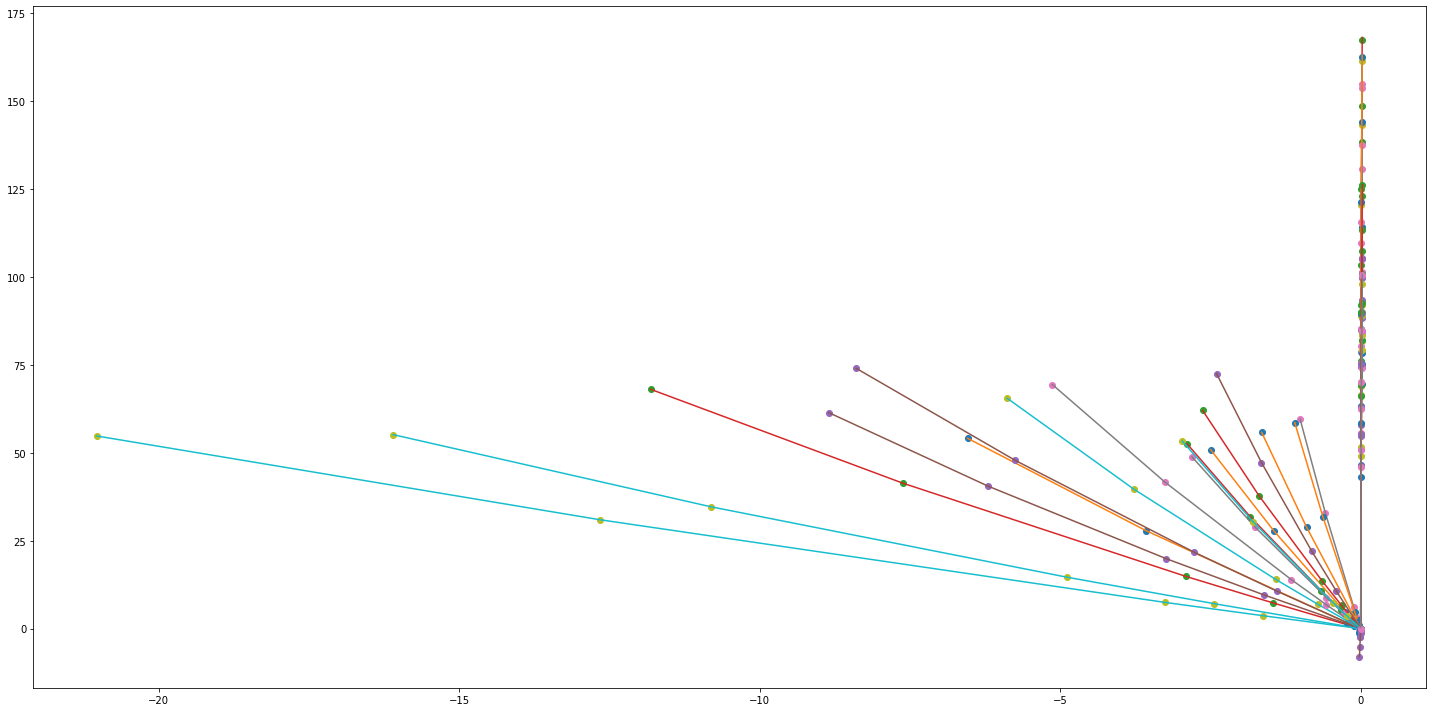

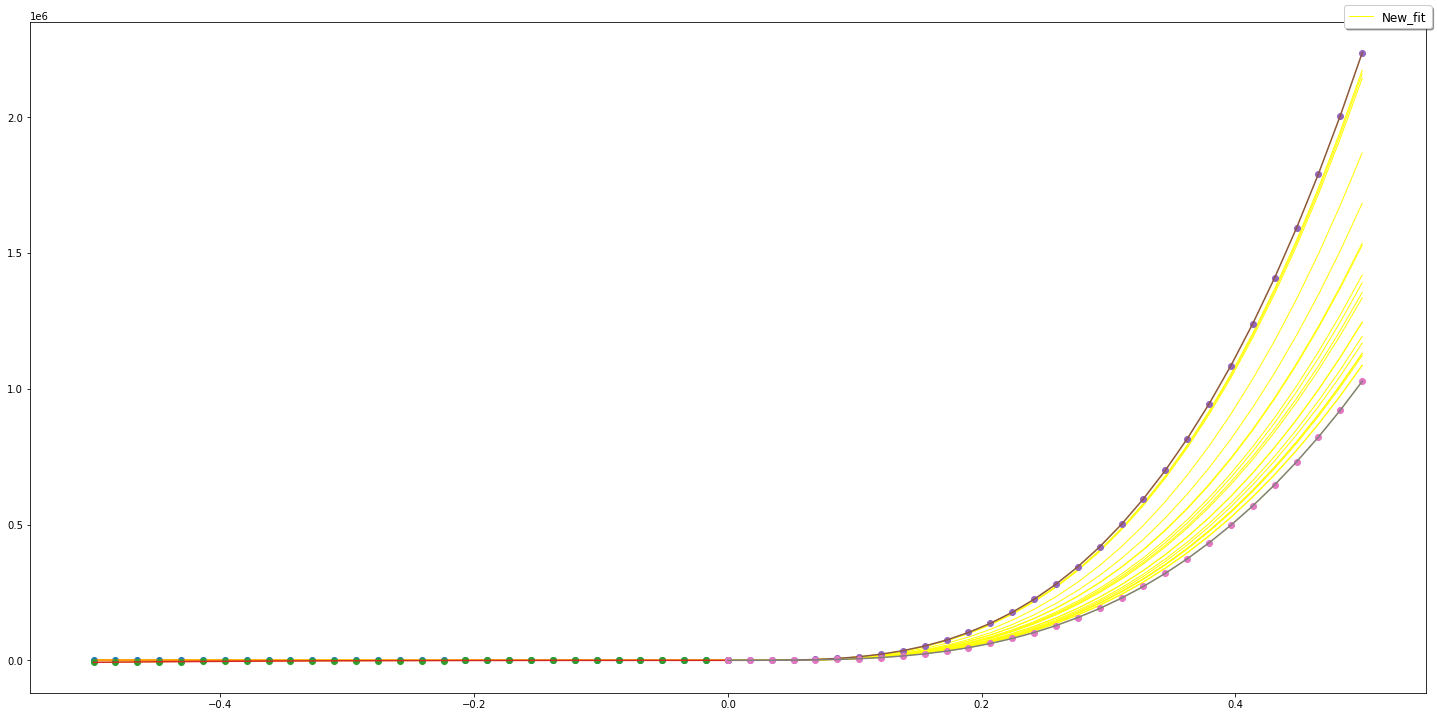

In [131]:
def test_func(x, a,b,c,d):
    y = a+b*x-c*np.exp(-d*x)
    return y
def test_func(x, a,b,c,d):
    y = a+b*x-c*np.exp(d*x)
    return y
def test_func(x, a,b,c,d):
    y = a+c*np.exp(d*x)
    return y

def polyval_func_wapper(x, p3):
    y = np.polyval(p3,x)
    return y

# def fitting_func_wapper(x, parameters):
#     a,b,c=parameters
#     y = a+b*x+c*x*x
#     return y

pressure_measure=list(pressure_df[colum_names["pressure"]["measure"]])
pressure_time=list(pressure_df[colum_names["pressure"]["time"]])
learn_pattern=PatternRecognition(delta_pointNumber =5)
learn_pattern.learn(pressure_measure,pressure_time,ground_truth_buildUp)
learn_pattern.parameters_PatternField

In [ ]:
# learn_pattern.curveData

In [115]:
breakpoints=learn_pattern.predict(pressure_measure,pressure_time)

In [116]:
learn_pattern.data_forPredict

KeyboardInterrupt: 

In [ ]:
print(len(breakpoints))
breakpoints

In [93]:
learn_pattern.parameters_PatternField

{'left_top': array([-1.20782030e+04, -1.81914110e+03, -9.43918657e+00,  4.37881368e+00]),
 'left_bottom': array([ 5.68362323e+04, -6.25953527e+02,  3.51861465e+02, -9.06842313e-03]),
 'right_top': array([ 1.98633499e+07, -1.02594438e+06,  2.00614262e+04,  6.45184430e-01]),
 'right_bottom': array([ 9.18604031e+06, -5.05947599e+05,  1.07896452e+04, -5.80858050e+00])}

In [94]:
learn_pattern.sav_pattern()

In [96]:
learn_pattern.load_pattern()
learn_pattern.parameters_PatternField 

The pattern parameters {self.parameters_PatternField} are loaded


{'left_top': [-12078.202959012126,
  -1819.1411044032204,
  -9.439186568362786,
  4.378813682581828],
 'left_bottom': [56836.23232700488,
  -625.9535272718291,
  351.8614652014545,
  -0.009068423134262519],
 'right_top': [19863349.885035384,
  -1025944.3808259905,
  20061.426167474212,
  0.6451844296260554],
 'right_bottom': [9186040.314426905,
  -505947.59932328865,
  10789.645196994841,
  -5.808580497389206]}

---initializing...
---plotting...
detected 25 points as breakpoints
The plot is devided into 9 rows
------row 1-----detected points:[328]


findfont: Font family ['Arial Black'] not found. Falling back to DejaVu Sans.


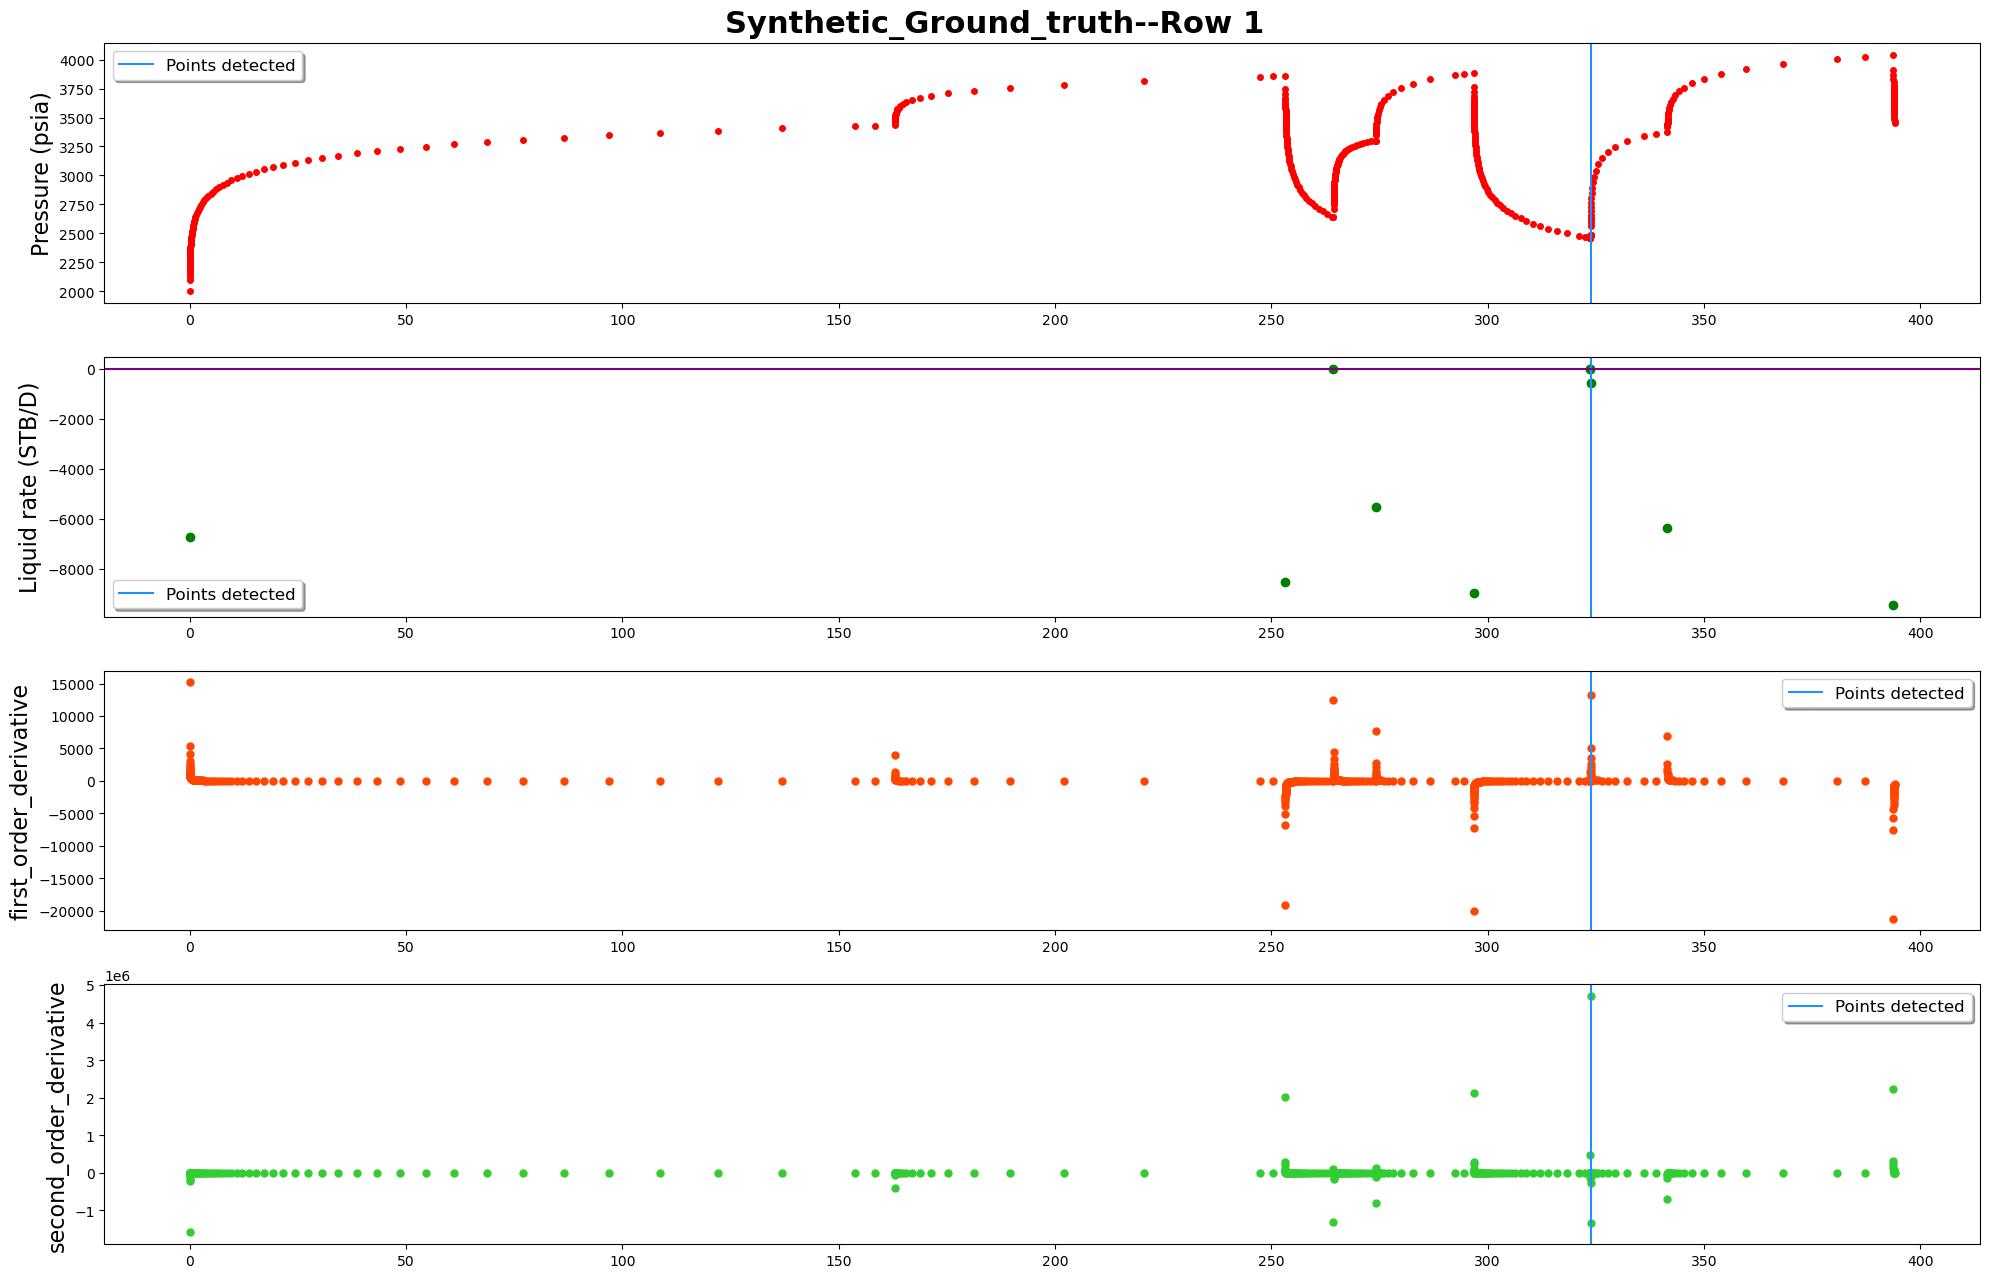

------row 2-----detected points:[446, 523, 713, 745]


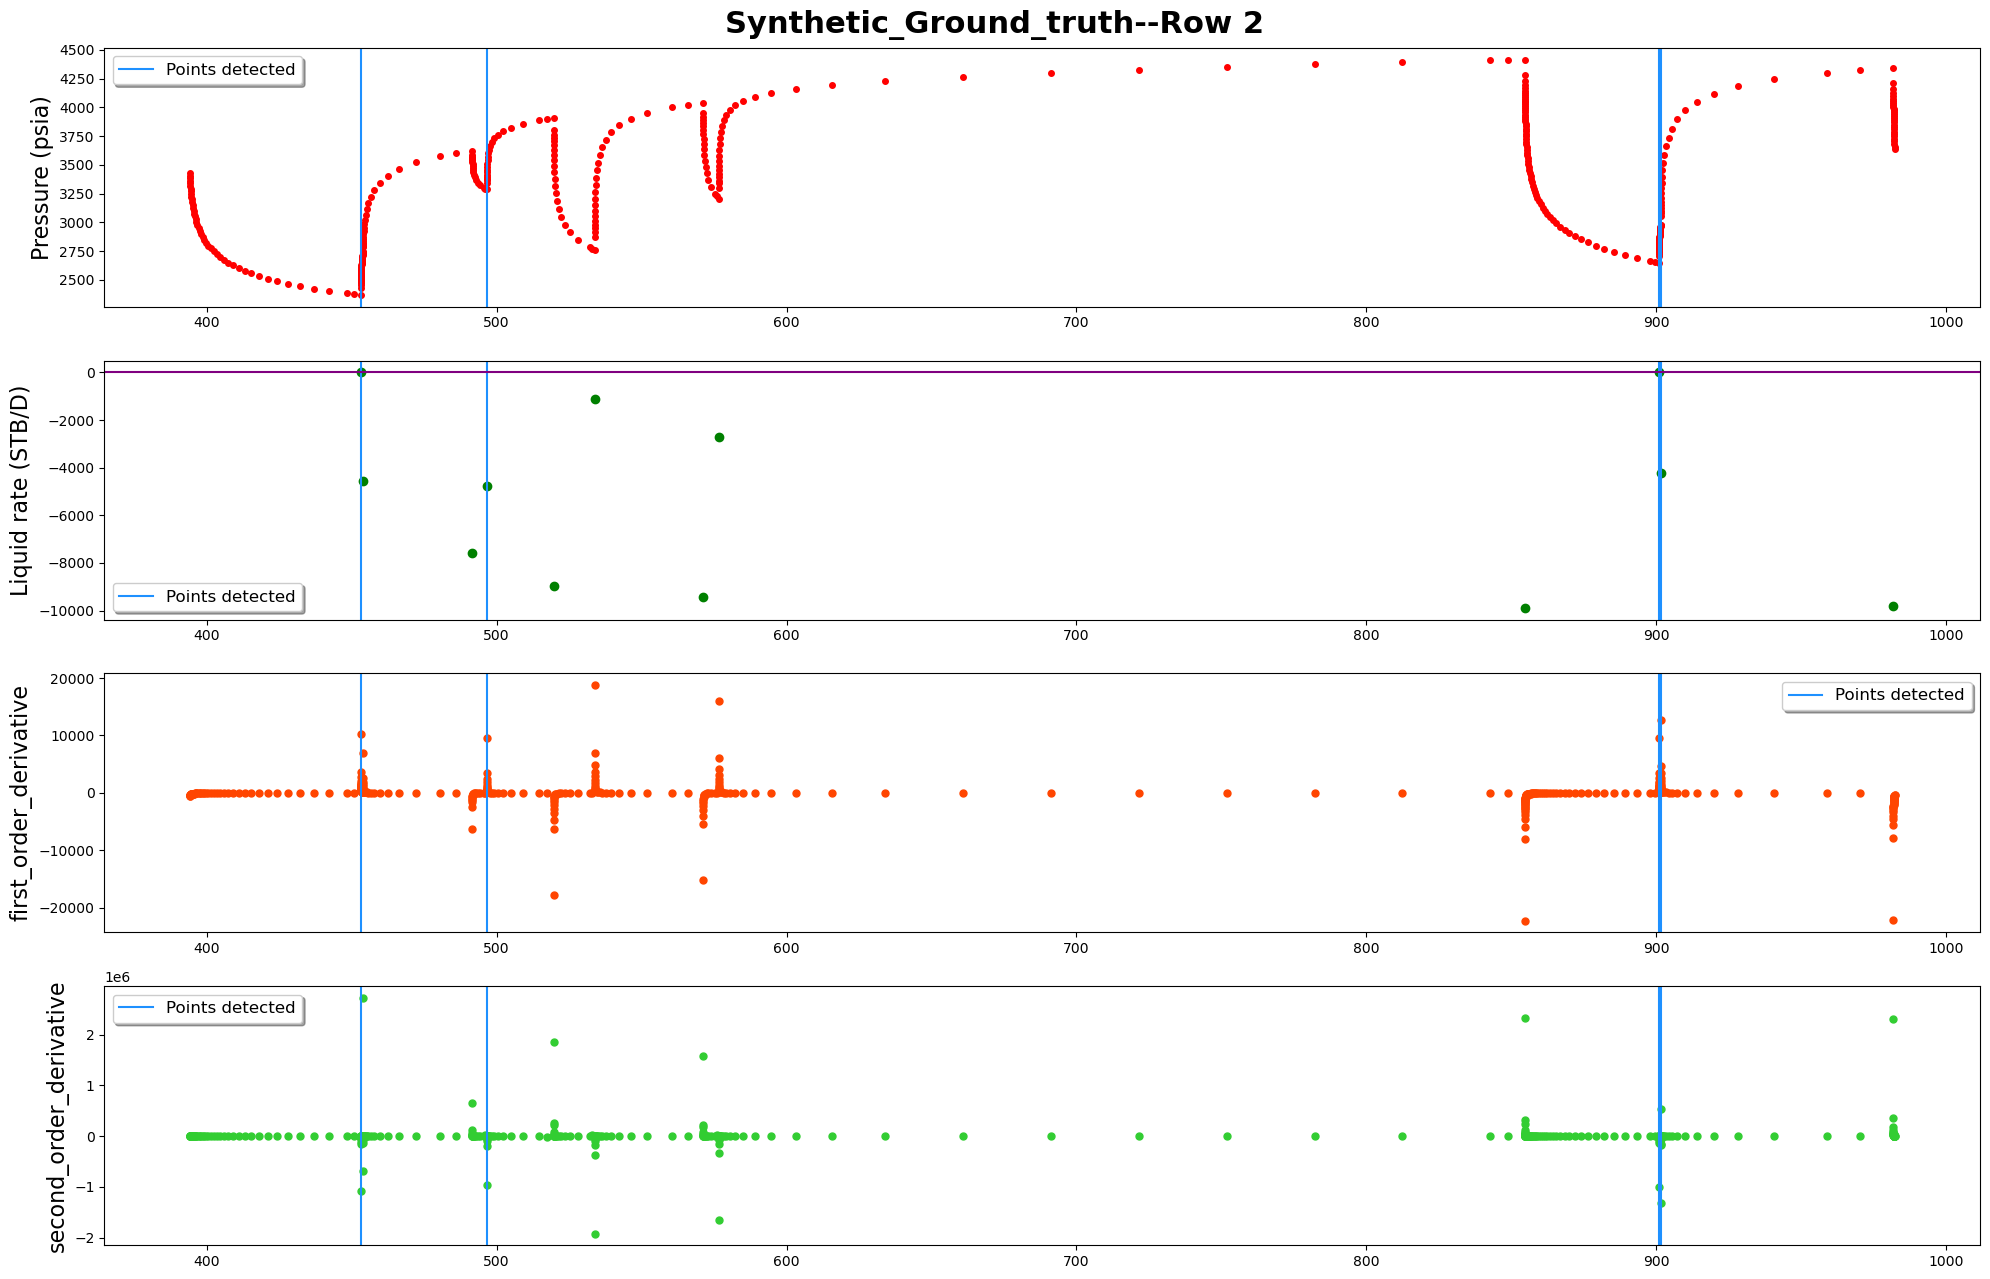

------row 3-----detected points:[860, 1101, 1151]


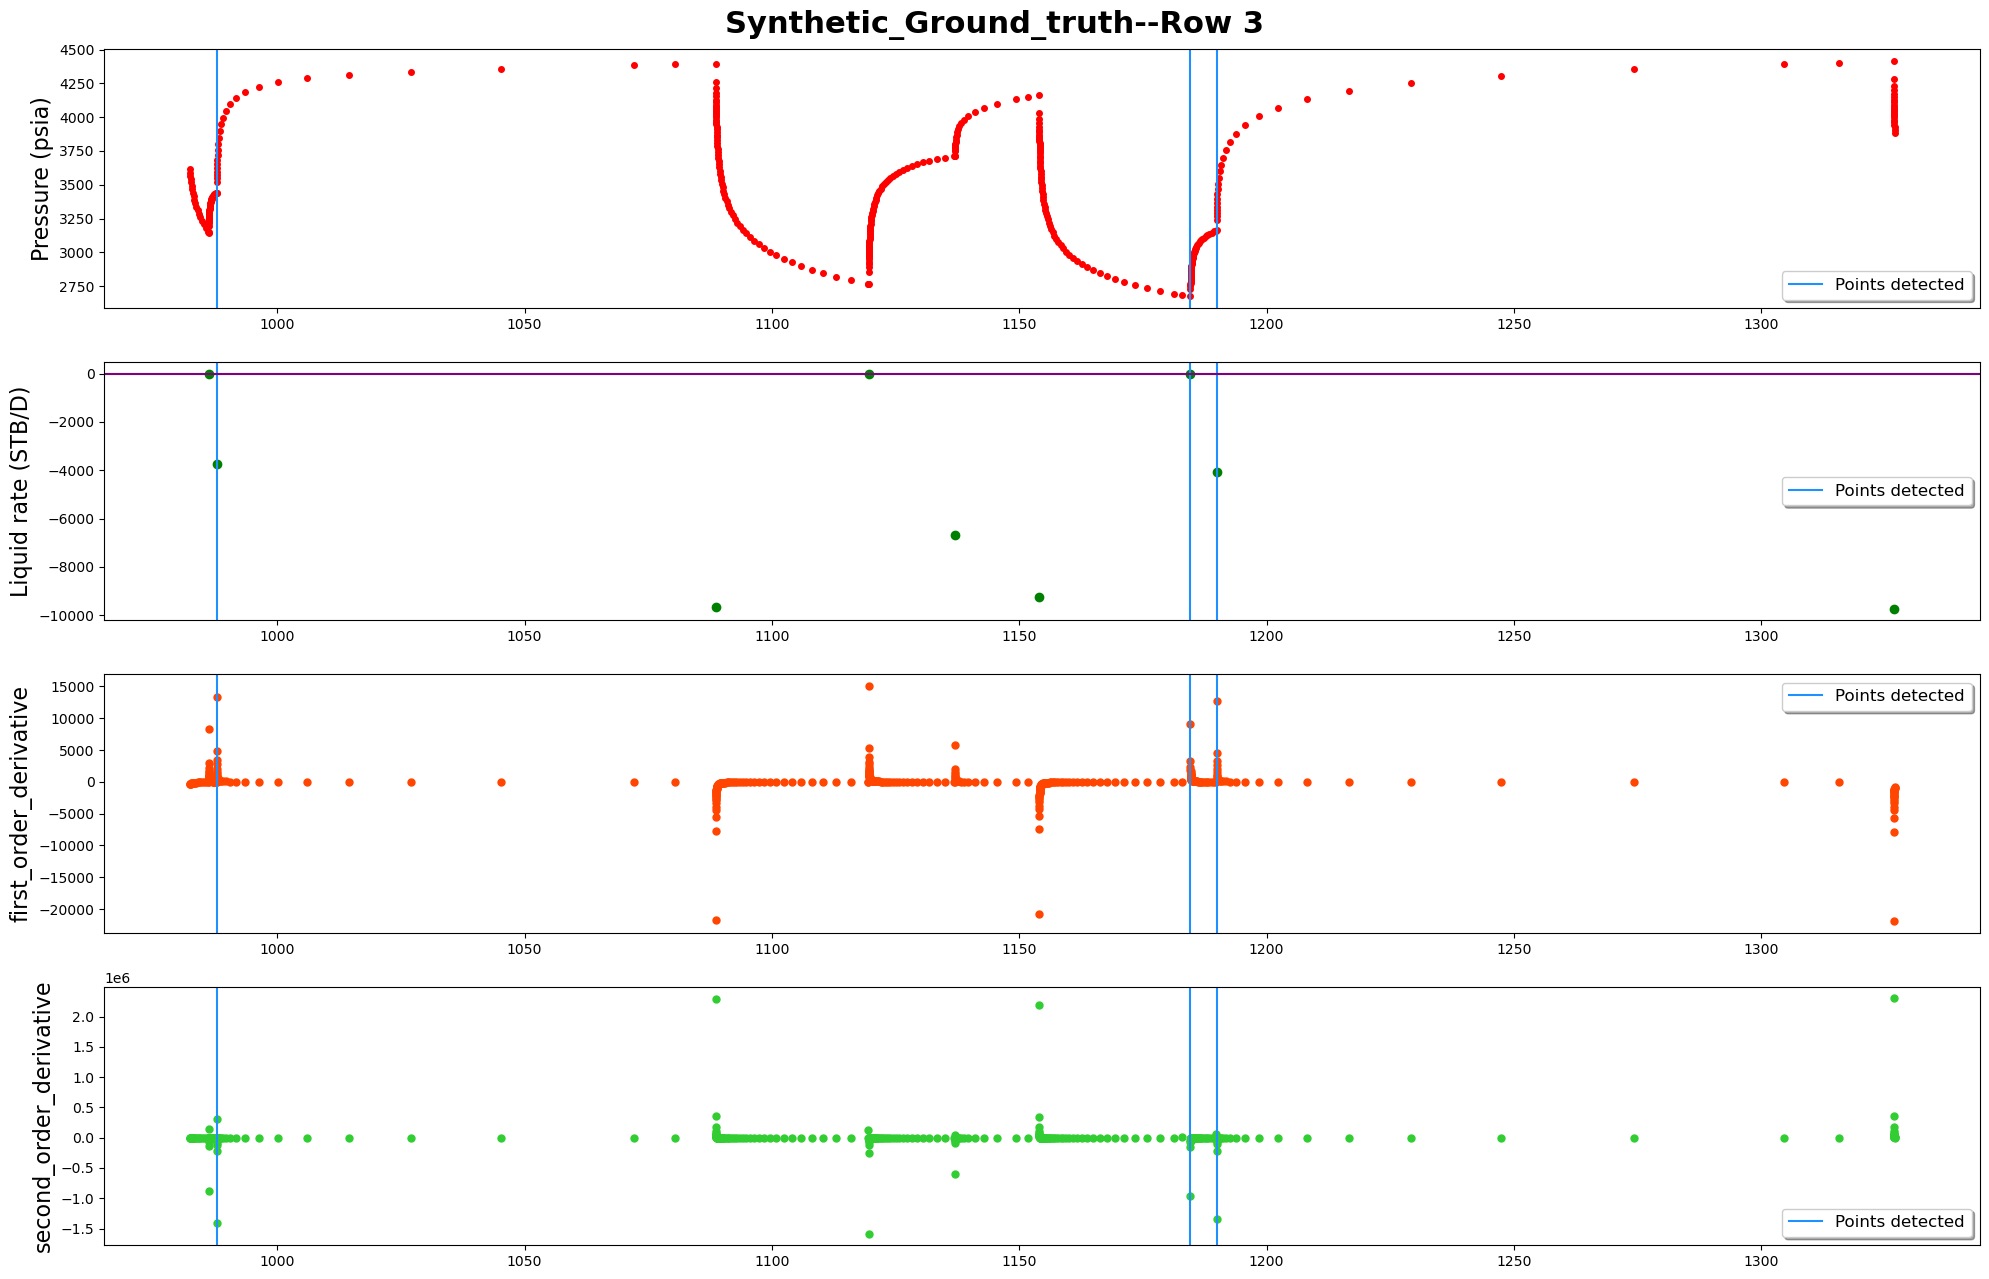

------row 4-----detected points:[1291, 1396, 1434, 1513]


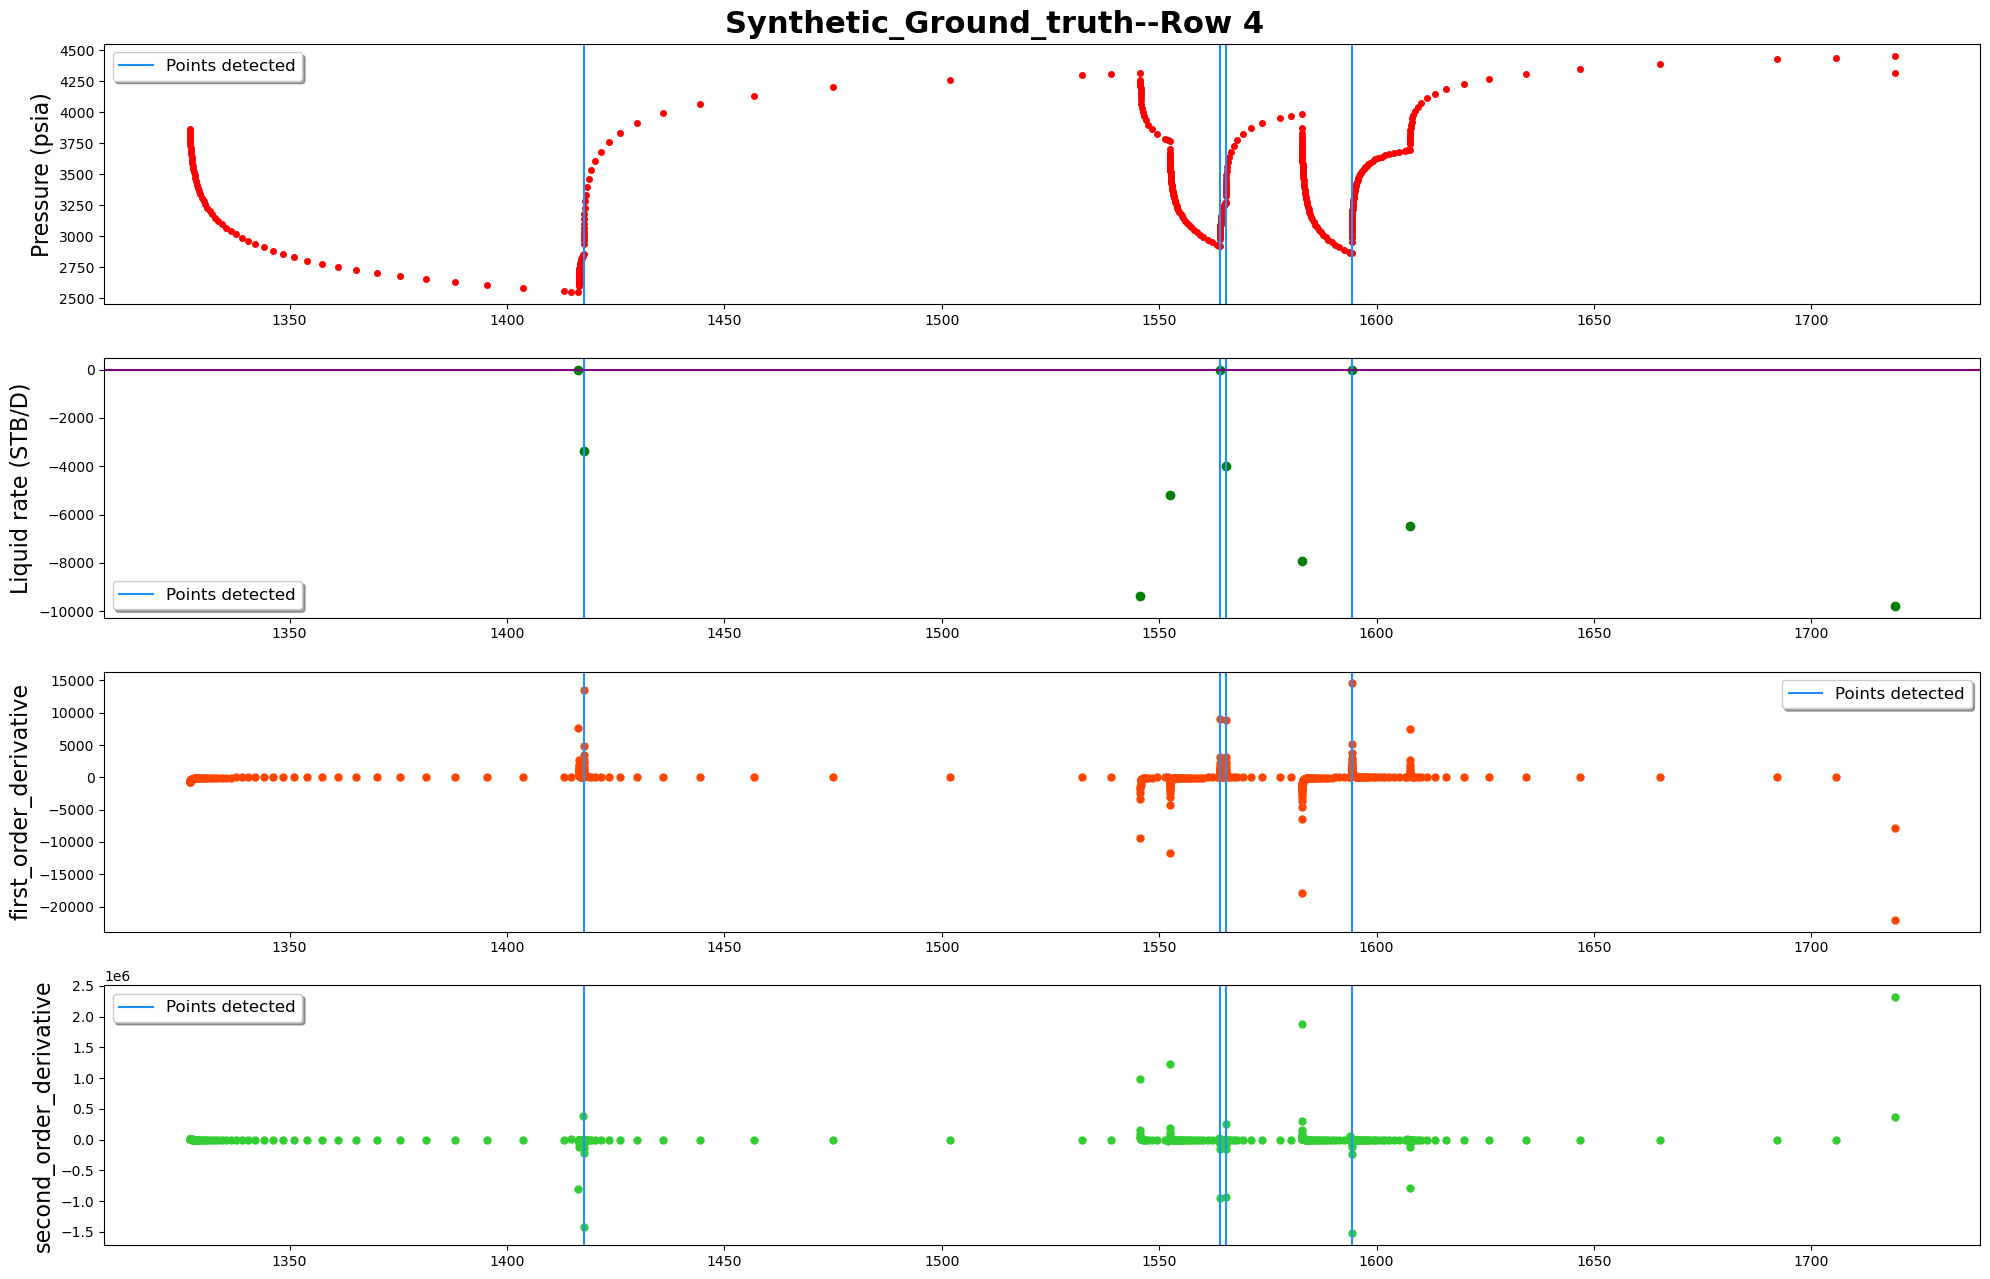

------row 5-----detected points:[1693, 1784, 1982]


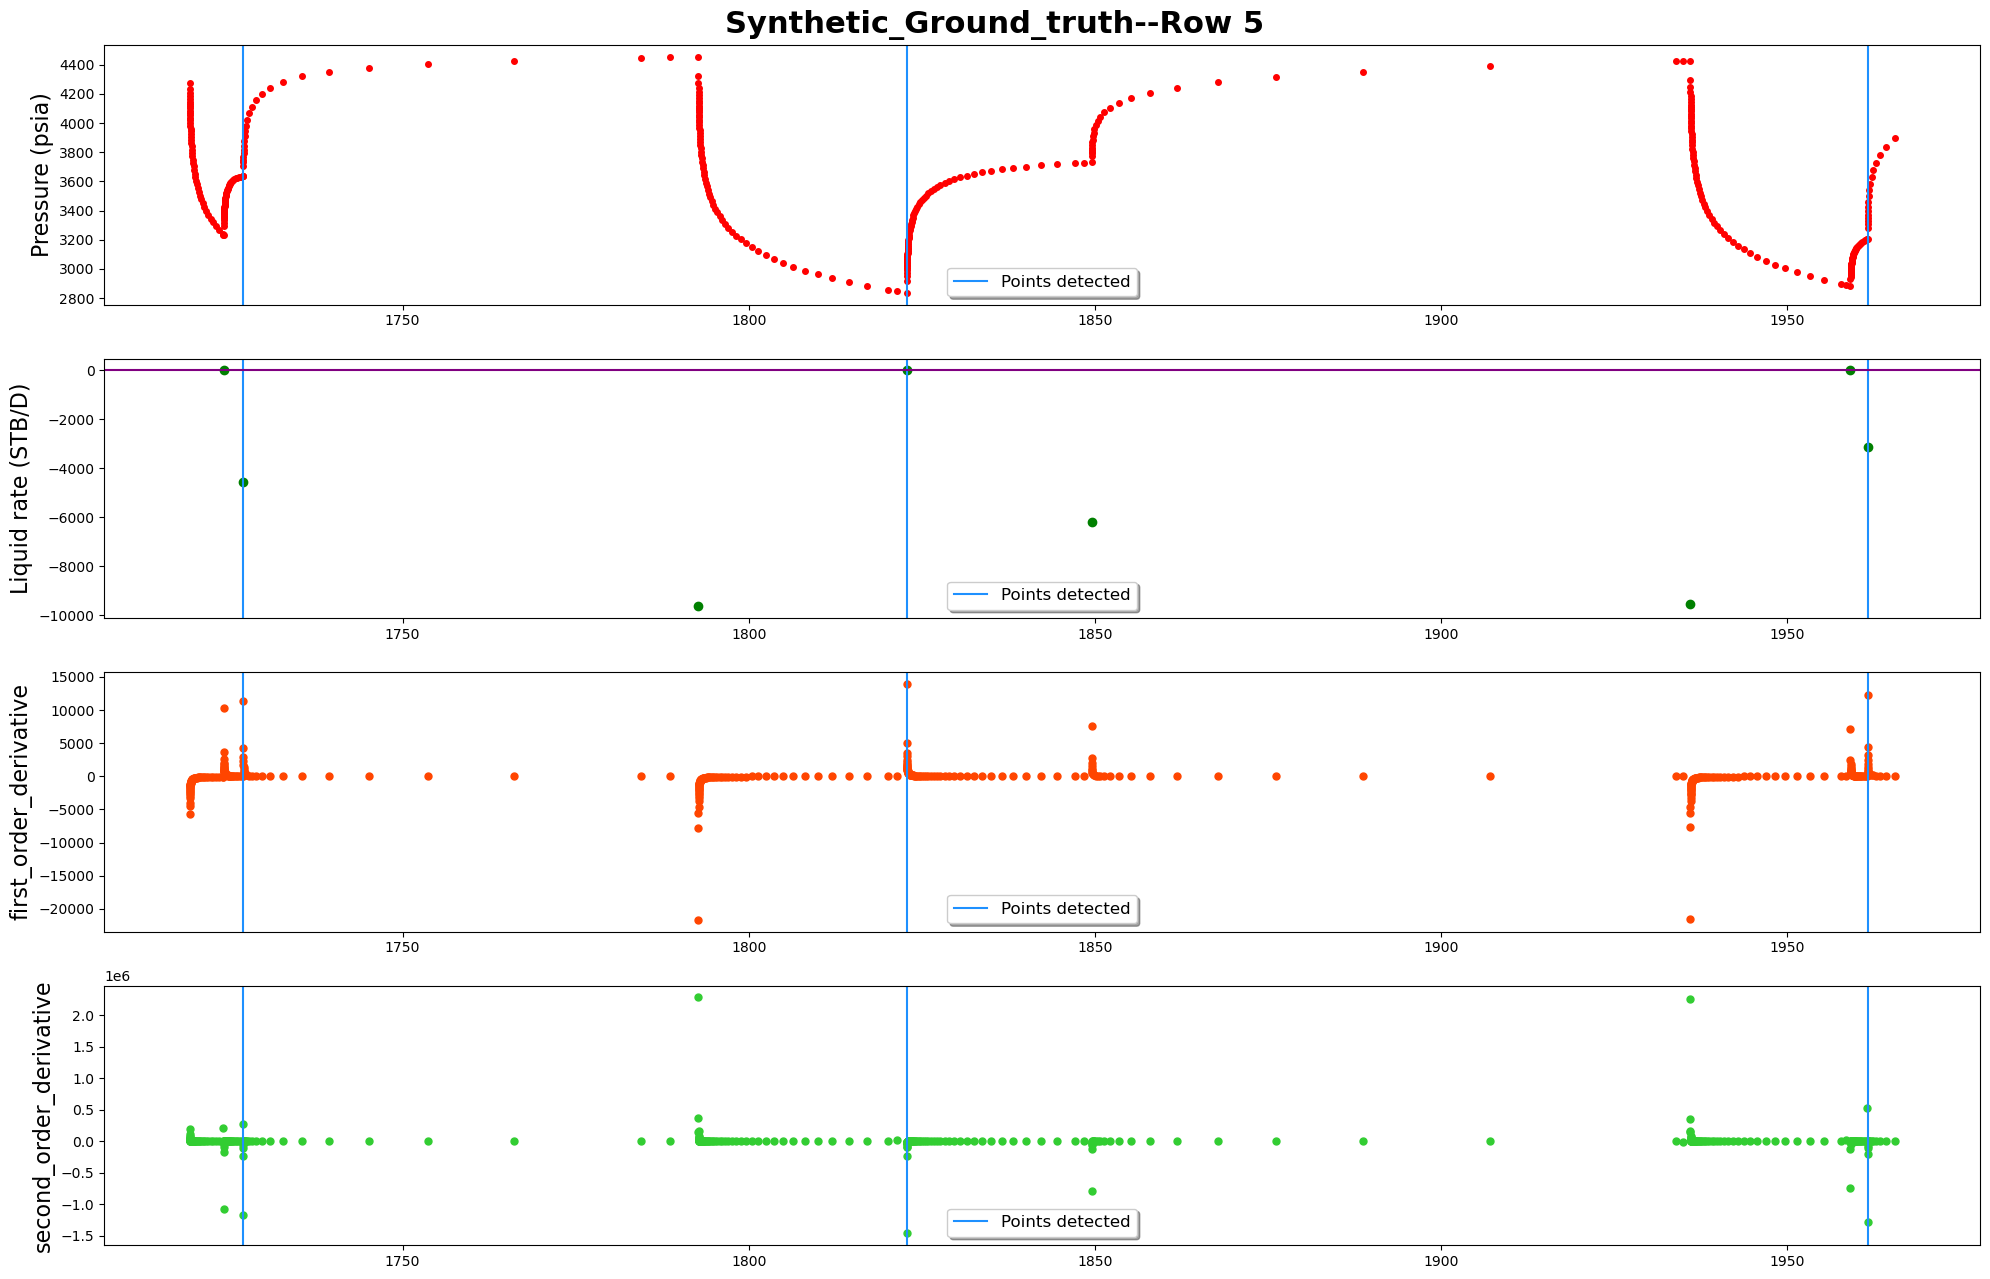

------row 6-----detected points:[2106, 2289]


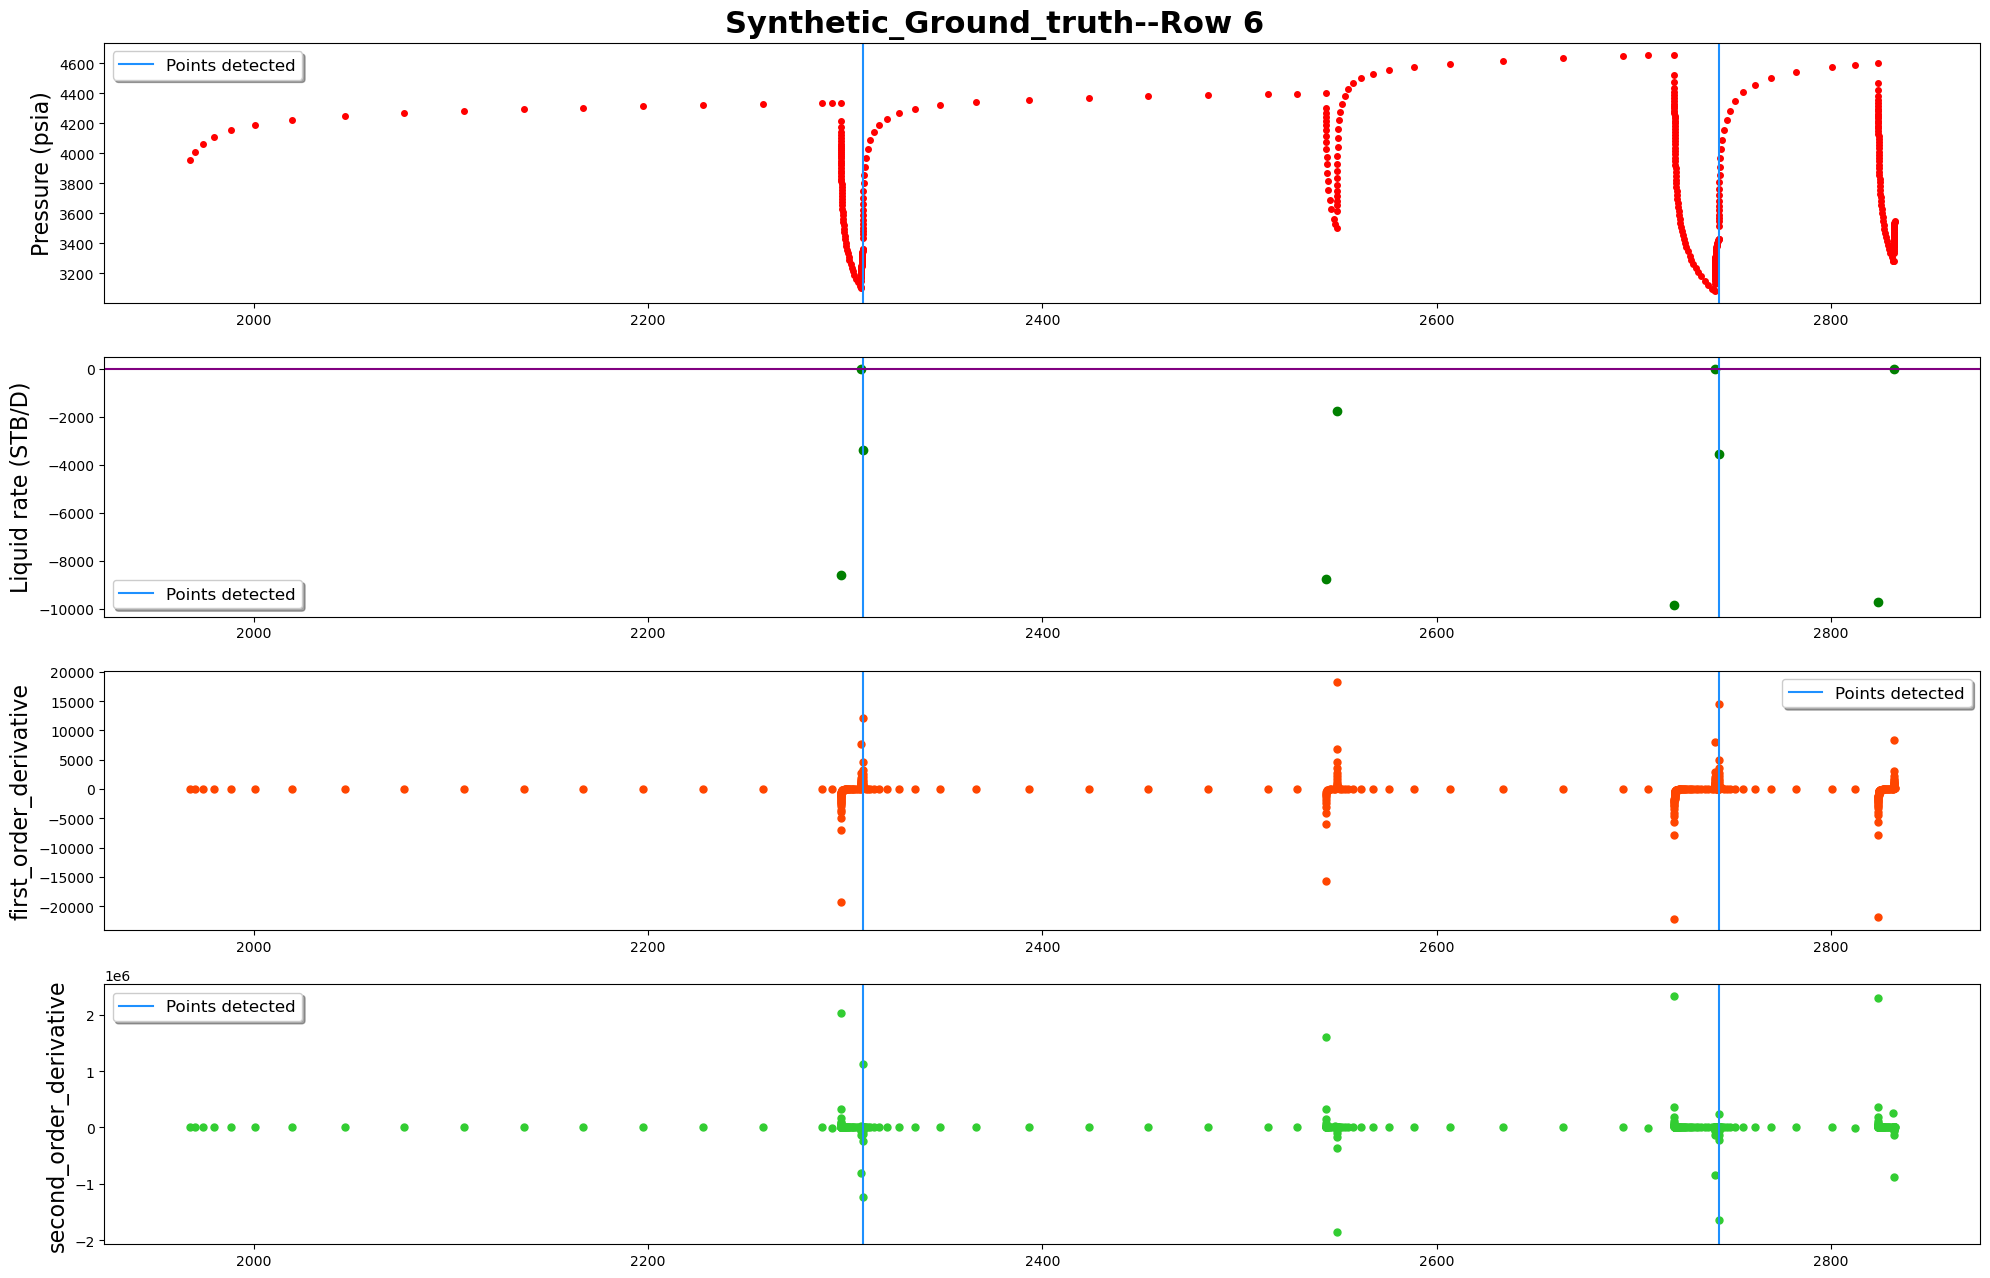

------row 7-----detected points:[2409, 2528, 2610, 2764]


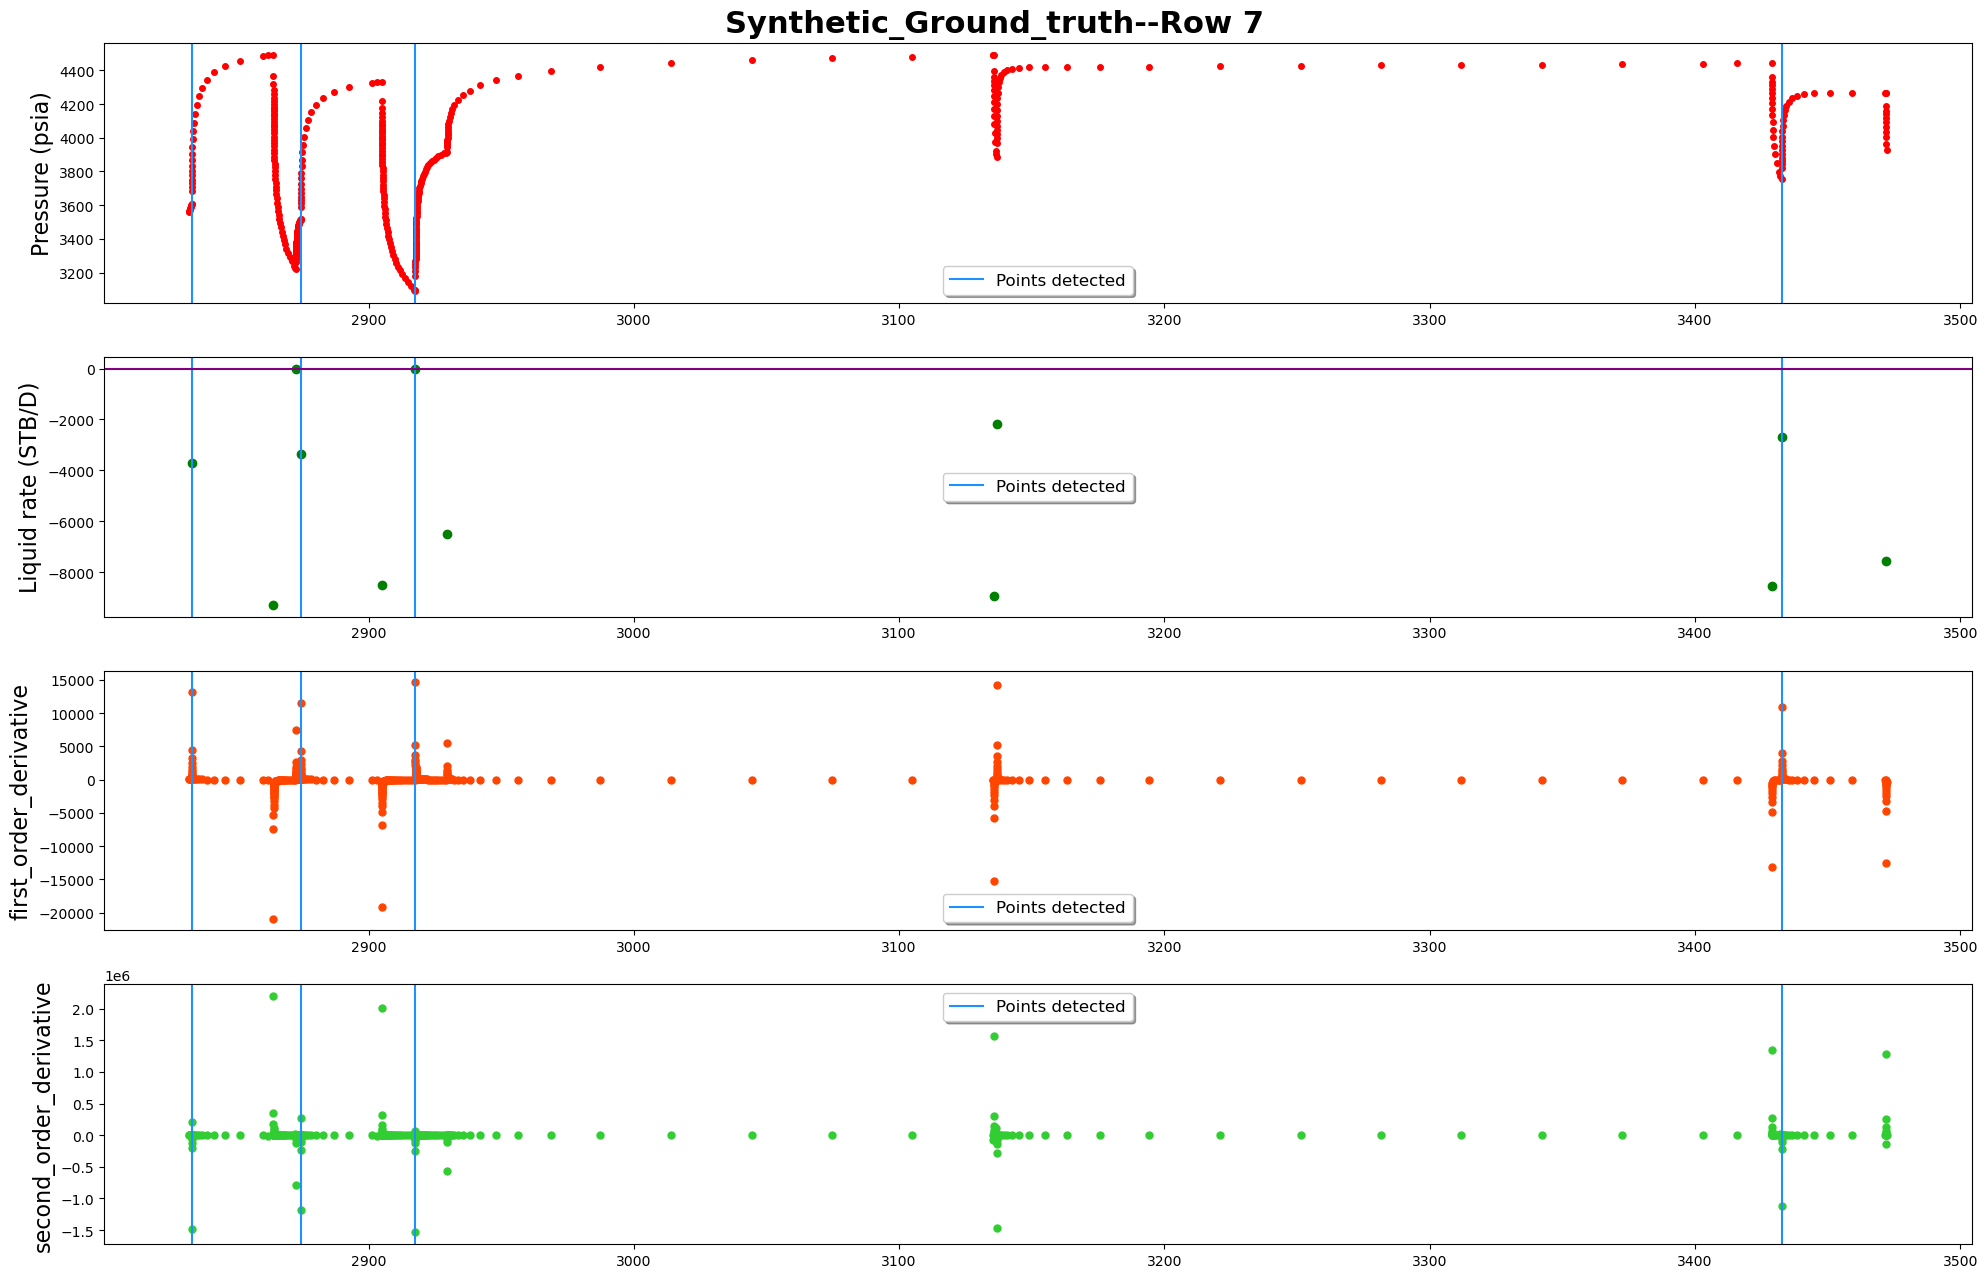

------row 8-----detected points:[2807, 2916, 3044]


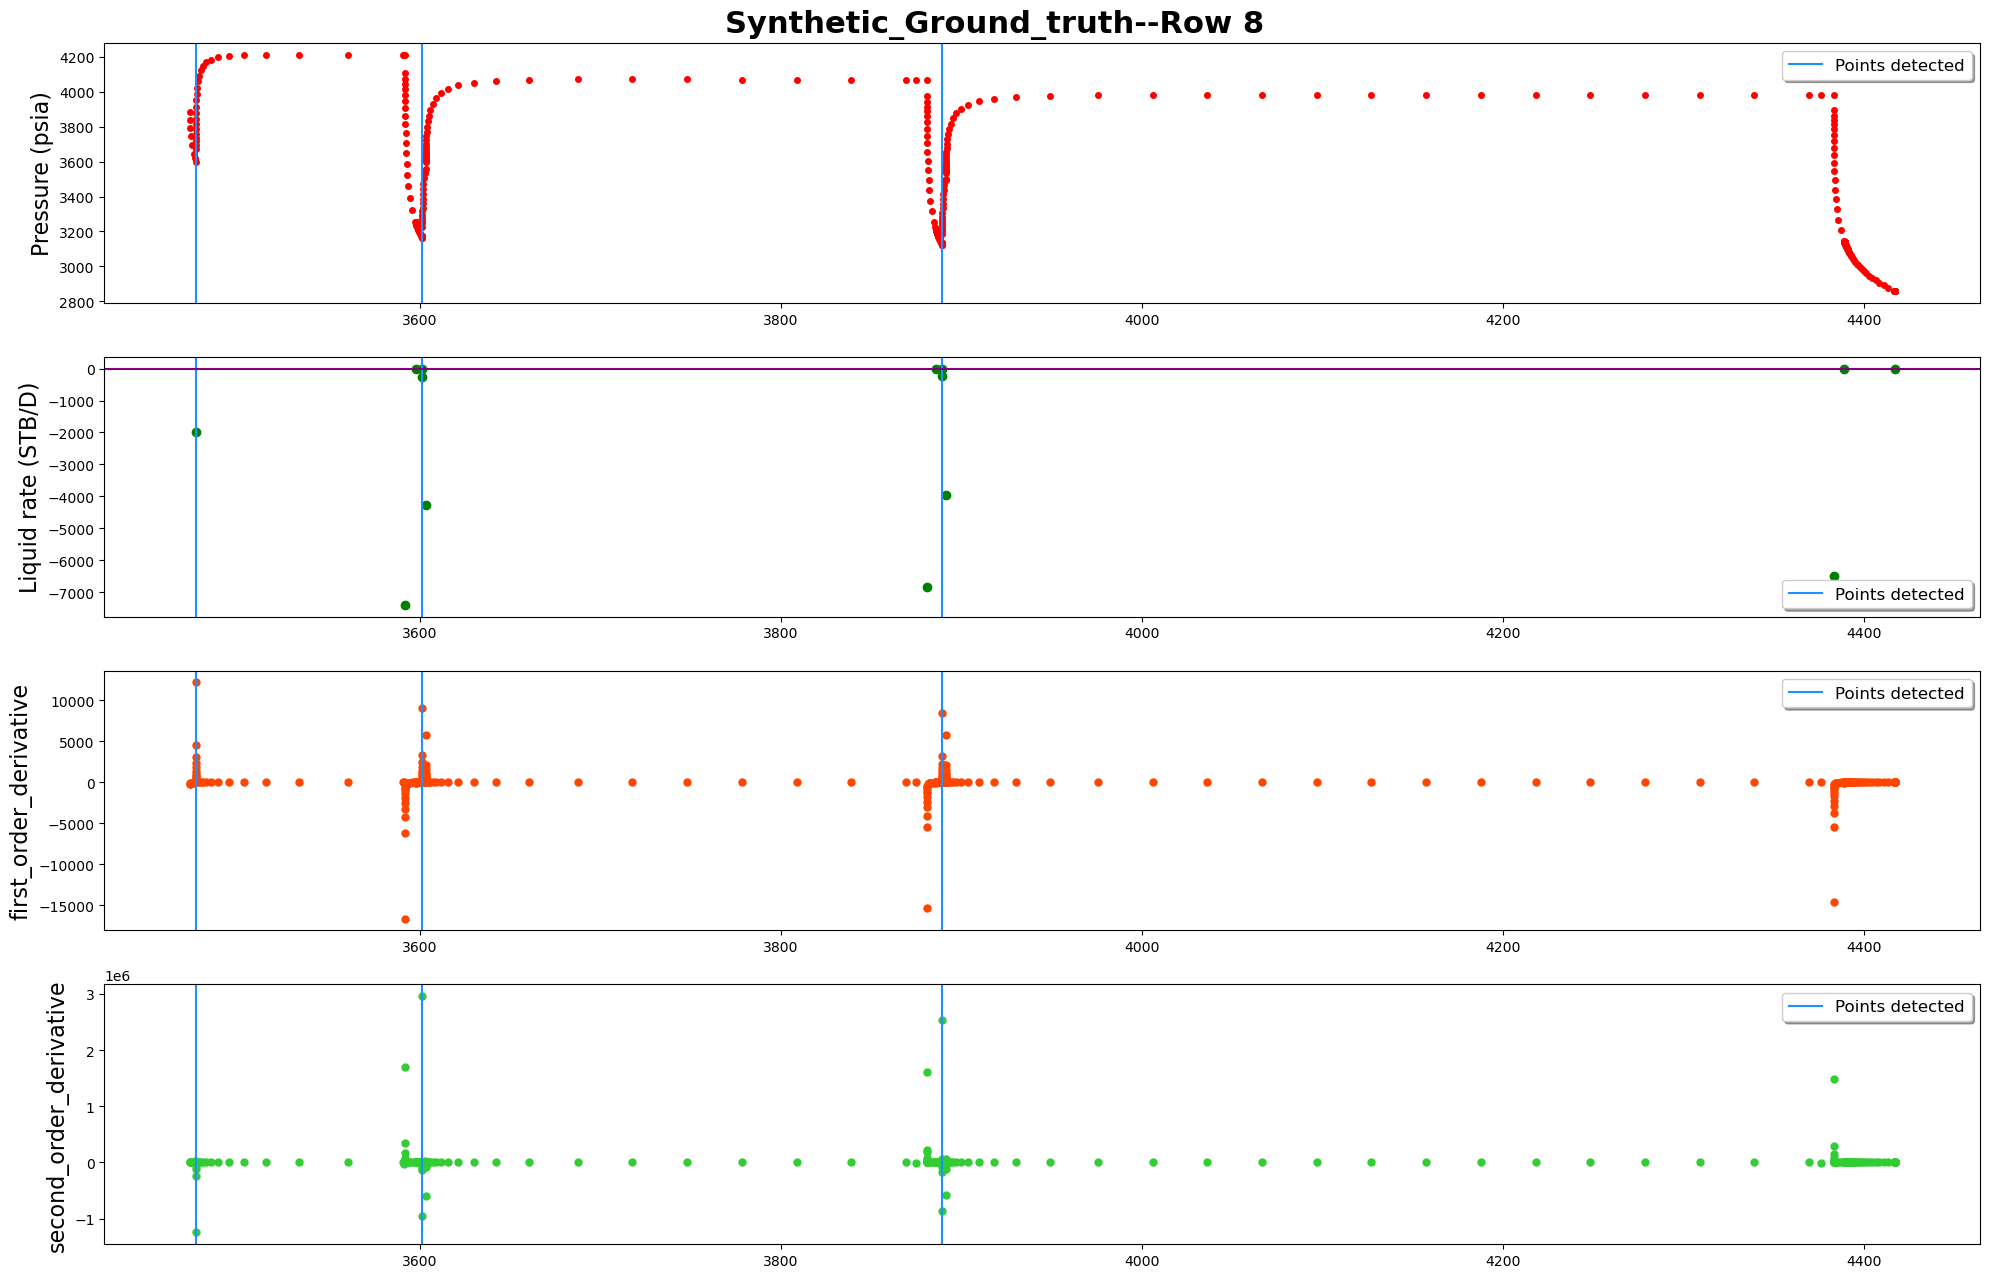

------row 9-----detected points:[3240]


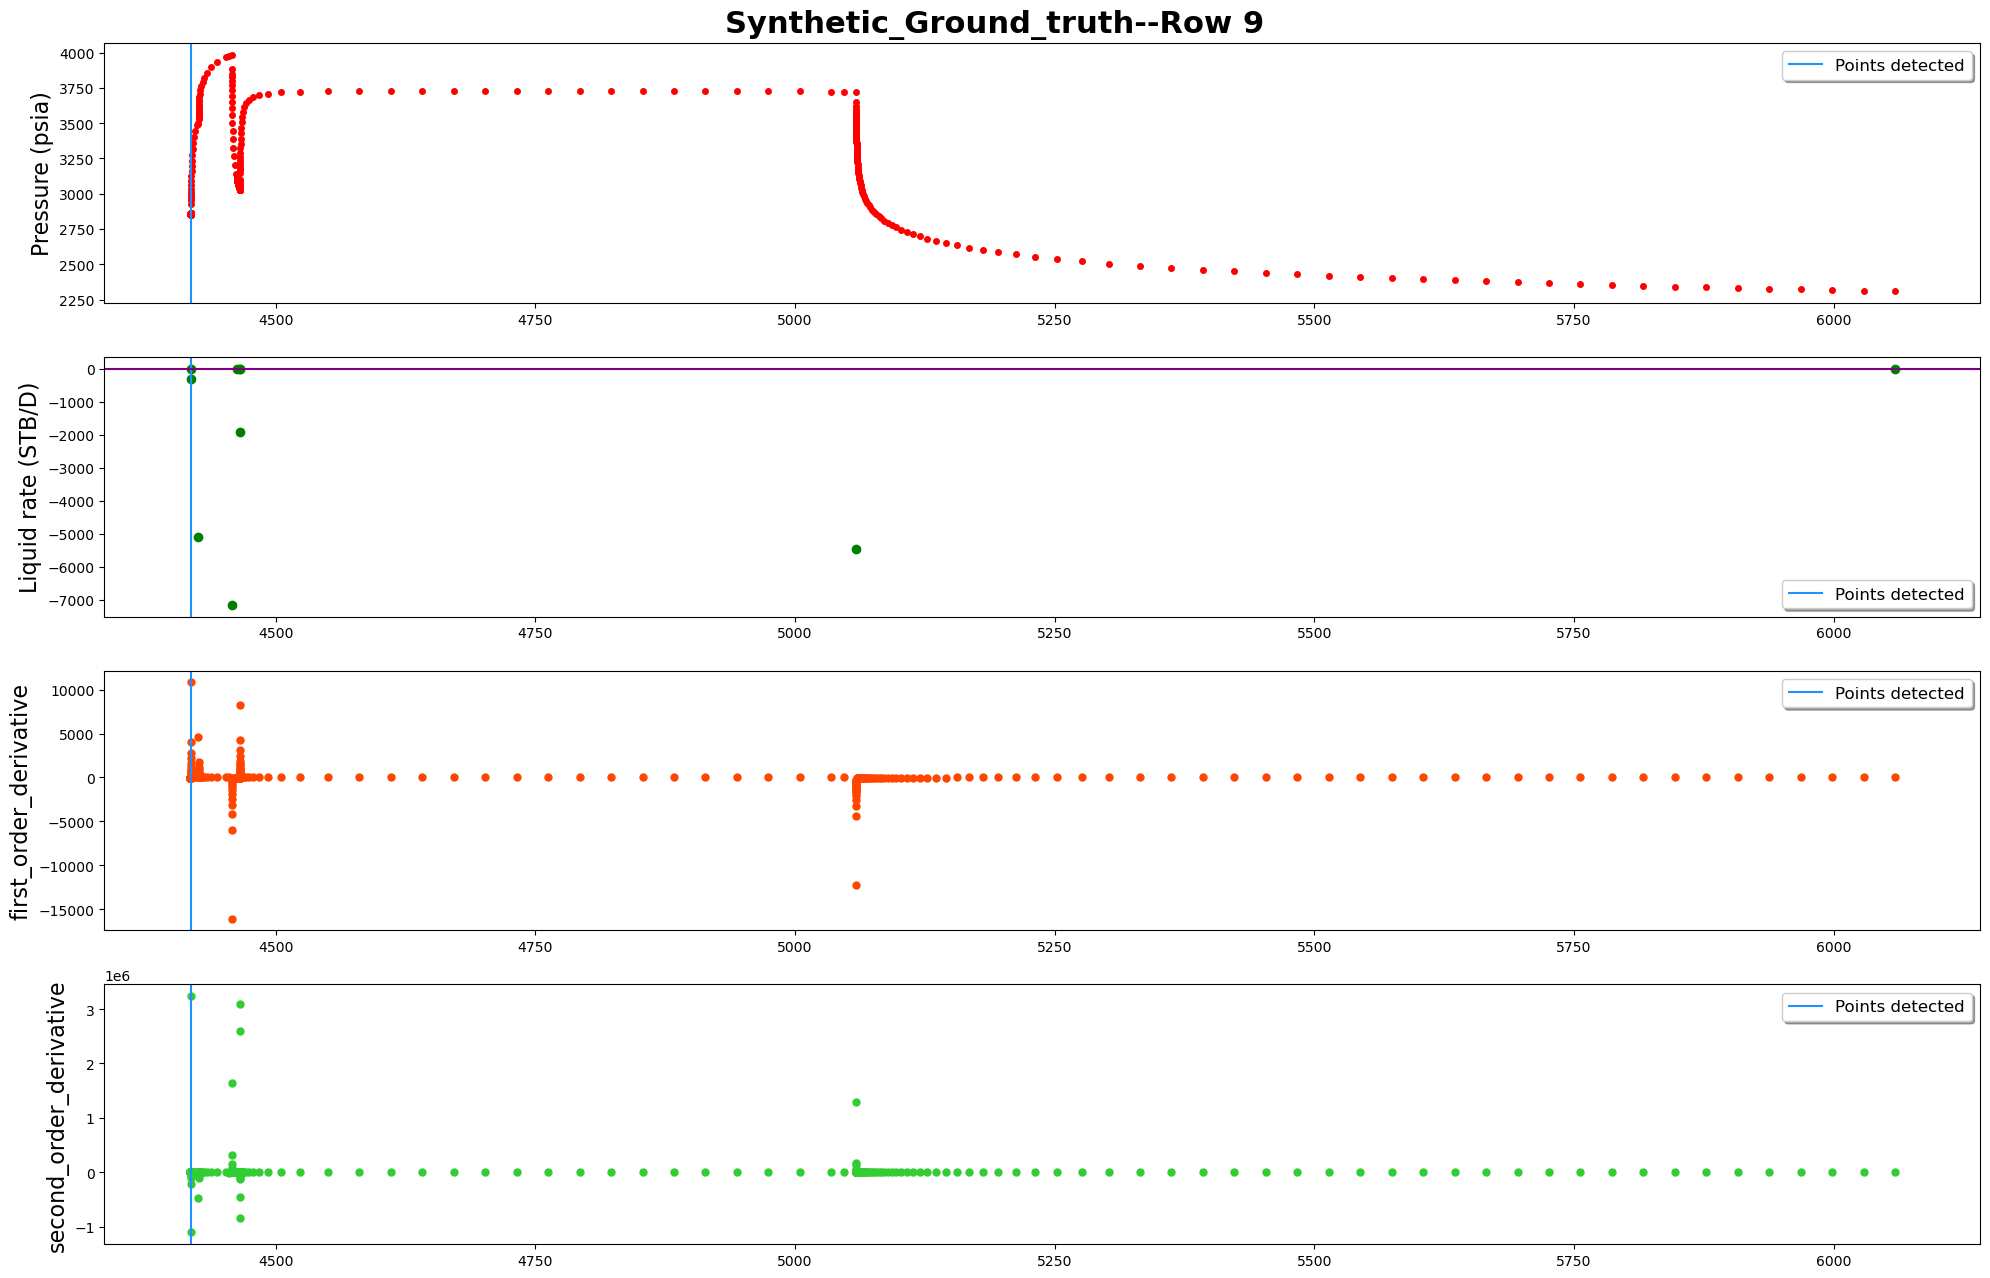

In [20]:
# filename_toSave="../data_output/Synthetic_Ground_truth_patternDetection.pdf"
# plot_name="Synthetic_Ground_truth"
# plot_whole=False
# plot_details=True
# plot_statistics=False
# PlotNSave(pressure_df,
#           rate_df,
#           breakpoints,
#           [],
#           data_inOneRow,
#           plot_name,
#           filename_toSave,
#           plot_statistics,
#           plot_whole,
#           plot_details,
#           colum_names)

In [52]:
filePath_learnedPattern="../data_output/Learned_Pattern.csv"
border_names=["left_top","left_bottom","right_top","right_bottom"]
paras_df = pd.read_csv(filePath_learnedPattern, delimiter=" ",skiprows=1, names=border_names,skipinitialspace = True) 
paras_df

,left_top,left_bottom,right_top,right_bottom
0,[-1.20782030e+04 -1.81914110e+03 -9.43918657e+...,[ 5.68362323e+04 -6.25953527e+02 3.51861465e+...,[ 1.98633499e+07 -1.02594438e+06 2.00614262e+...,[ 9.18604031e+06 -5.05947599e+05 1.07896452e+...


In [22]:
# #spline interpolation
# x_i=np.linspace(0,10,100)
# f_spline=interpld(xdata,ydata,kind="cubic")
# y_is=f_spline(x_i)

In [130]:
a={"pressure_time_right":[1,2,3],
"pressure_measure_right":[4,5,6]}
b={key:[value] for key,value in a.items()}
pd.DataFrame(a)
pd.DataFrame(b)

,pressure_time_right,pressure_measure_right
0,"[1, 2, 3]","[4, 5, 6]"


In [23]:
curveData= pd.DataFrame({'Odd':[[1,3,15,6,7,9]], 'Even':[[0,12,4,6,8,10]]})
data = pd.DataFrame({'Odd':[[1,3,5,6,7,9]], 'Even':[[0,2,4,6,8,10]]})
curveData=curveData.append(data,ignore_index=True)
# data=data.iloc[::-1]
display(curveData)
for index,row in curveData.iterrows():
#     print(row)
#     row['Odd'].reverse()
    print(row.index)
display(curveData)

,Odd,Even
0,"[1, 3, 15, 6, 7, 9]","[0, 12, 4, 6, 8, 10]"
1,"[1, 3, 5, 6, 7, 9]","[0, 2, 4, 6, 8, 10]"


Index(['Odd', 'Even'], dtype='object')
Index(['Odd', 'Even'], dtype='object')


,Odd,Even
0,"[1, 3, 15, 6, 7, 9]","[0, 12, 4, 6, 8, 10]"
1,"[1, 3, 5, 6, 7, 9]","[0, 2, 4, 6, 8, 10]"
